**This Jupyter Notebook requires a Python Kernel of the abz-env Conda Env**

In [24]:
from highway_reproduction import *
from custom_highway import *
import itertools

from highway_env.vehicle.kinematics import Vehicle
from highway_env.vehicle.behavior import IDMVehicle
Vehicle.MIN_SPEED = 0.0

In [25]:
BrakingVehicle.MIN_SPEED = 1.0 #1.5
IDMVehicle.ACC_MAX = 5.0
IDMVehicle.MIN_SPEED=0.5

In [26]:
def takewhile_inclusive(predicate, it):
    """Source: https://stackoverflow.com/a/70762559"""
    for x in it:
        if predicate(x):
            yield x
        else:
            yield x
            break

In [27]:
env_idm = gym.make("highway-env-fast-seedable-v0", render_mode=None)
env_idm.configure({
    "observation_seed": [1.0, 0.13285615911351908, 0.0, 0.0888671875, 0.0, 1.0, 0.048065185546875, 0.0, -0.0625, 0.0, 1.0, 0.0730743408203125, 0.0, -0.0624847412109375, 0.0, 1.0, 0.09807586669921875, 0.0, -0.019060134887695312, 0.0, 1.0, 0.9999997615814209, 0.0, 0.0, 0.0],
    #"other_vehicles_type": "custom_highway.BrakingVehicle",
        "action": {
            "type": "DiscreteAction",
            "acceleration_range": [-5.0, 5.0],
            "longitudinal": True,
            "lateral": False,
            "speed_range": [0, 40],
            "dynamical": False,
            "clip": True}
})

/home/samuel/anaconda3/envs/abz/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


In [37]:
env_idm.unwrapped.config["simulation_frequency"] = 10

In [38]:
res_nn,res_braking, nn_traj, default_traj = reproduce_crash_evaluate_with_trajectory([env_idm], "../nets/highspeed-rew-1.zip", test_runs=1, default_action=0,seed=0)
#res_nn,res_braking, nn_traj, default_traj = reproduce_crash_evaluate_with_trajectory([env_front_brakes], "../nets/nn_small_improved-ld.zip", test_runs=1, default_action=0,render=False)

Testing model
Testing default action


/home/samuel/anaconda3/envs/abz/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(fil

In [39]:
print(res_nn)
print(res_braking)
print("Seconds NN: ", len(nn_traj))
print("Seconds Braking: ", len(default_traj))

([1], [0.5270937669921876])
([1], [0.5270937669921876])
Seconds NN:  3
Seconds Braking:  3


In [40]:
env_idm.unwrapped.config["simulation_frequency"] = 100

In [41]:
res_nn_1000,res_braking_1000, nn_traj_1000, default_traj_1000 = reproduce_crash_evaluate_with_trajectory([env_idm], "../nets/highspeed-rew-1.zip", test_runs=1, default_action=0,seed=0)

/home/samuel/anaconda3/envs/abz/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(fil

Testing model
Testing default action


In [42]:
print(res_braking_1000)
print("Seconds Braking: ", len(default_traj_1000))

([0], [15.0263671875])
Seconds Braking:  31


# Plot

In [43]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
ego_positions_brake_1000 = map(lambda x: x[0][1], default_traj_1000)
other_positions_brake_1000 = map(lambda x: x[0][1]+x[1][1], default_traj_1000)

ego_positions_brake_1000 = np.array(list(ego_positions_brake_1000))
other_positions_brake_1000 = np.array(list(other_positions_brake_1000))

print(ego_positions_brake_1000*5*40)
print(other_positions_brake_1000*5*40)

[26.571232 31.205606 31.644466 31.635645 31.610397 31.610146 31.584902
 31.584648 31.559406 31.559153 31.533907 31.533651 31.50841  31.508158
 31.48291  31.482658 31.457415 31.45716  31.431915 31.431664 31.406418
 31.406166 31.38092  31.380669 31.355423 31.355171 31.329927 31.329674
 31.304428 31.304178 31.278933]
[36.18427  36.931454 37.418324 37.913513 38.411755 38.91111  39.410873
 39.989117 40.94861  42.257114 43.730095 45.282436 46.88698  48.531372
 50.20791  51.91122  53.637276 55.383003 57.145954 58.92415  60.715973
 62.52005  64.33525  66.160576 67.99518  69.83833  71.68938  73.54775
 75.41295  77.284515 79.16203 ]


In [45]:
ego_positions_brake = map(lambda x: x[0][1], default_traj)
other_positions_brake = map(lambda x: x[0][1]+x[1][1], default_traj)

ego_positions_brake = np.array(list(ego_positions_brake))
other_positions_brake = np.array(list(other_positions_brake))

print(ego_positions_brake*5*40)
print(other_positions_brake*5*40)

[26.571232 31.430607 32.025223]
[36.18427  36.84499  37.210155]


In [46]:
import matplotlib
font = {'size'   : 18}

matplotlib.rc('font', **font)

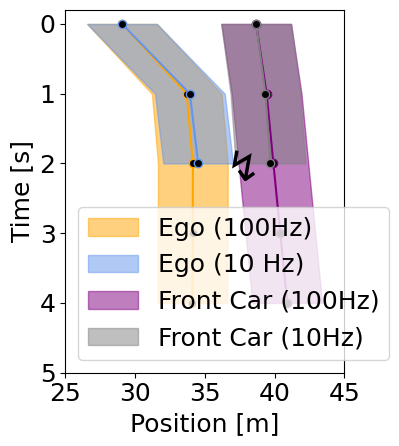

In [49]:
t = np.arange(0, 31, 1)
num_steps = 5
t_nn = -t[:num_steps]

x = ego_positions_brake_1000*5*40
x = x[:num_steps]
y = t_nn[:len(x)]
plt.fill_betweenx(y, x, x+5, alpha=0.5, color="orange", label="Ego (100Hz)")
plt.plot(x+2.5, y, markerfacecolor="black", marker="o",markersize=6, color="orange")

x = ego_positions_brake*5*40
x = x[:num_steps]
y = t_nn[:len(x)]
plt.fill_betweenx(y, x, x+5, alpha=0.5, color="cornflowerblue", label="Ego (10 Hz)")
plt.plot(x+2.5, y, markerfacecolor="black", marker="o",markersize=6, color="cornflowerblue")

x = other_positions_brake_1000*5*40
x = x[:num_steps]
y = t_nn[:len(x)]
plt.fill_betweenx(y, x, x+5, alpha=0.5, color="purple", label="Front Car (100Hz)")
plt.plot(x+2.5, y, markerfacecolor="black", marker="o",markersize=6, color="purple")

x = other_positions_brake*5*40
x = x[:num_steps]
y = t_nn[:len(x)]
plt.fill_betweenx(y, x, x+5, alpha=0.5, color="gray", label="Front Car (10Hz)")
plt.plot(x+2.5, y, markerfacecolor="black", marker="o",markersize=6, color="gray")

plt.xlabel("Position [m]")
plt.ylabel("Time [s]")
plt.xticks(np.arange(25, 46, 5))
plt.yticks(np.arange(0, -(num_steps+1), -1), np.arange(0, (num_steps+1), 1))
plt.legend()
plt.gca().set_aspect(5)
plt.tight_layout()
plt.text(36.5, -2.25, "↯",fontdict={'size': 30})
plt.savefig("euler-crash.pdf", bbox_inches='tight')
plt.show()